In [1]:
#packages
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
import db_dtypes
import google.oauth2.credentials
import google_auth_oauthlib.flow
import os
from google.cloud import bigquery
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
class BigQueryService():
    def __init__(self):
        self.client = bigquery.Client.from_service_account_json('/Users/Anusha/Downloads/yelp-project-374514-e8101d165db2.json')

    def execute_query(self, sql, verbose=True):
        if verbose == True:
            print(sql)
        job = self.client.query(sql)
        return job.result()

    def query_to_df(self, sql, verbose=True):
        """high-level wrapper to return a DataFrame"""
        results = self.execute_query(sql, verbose=verbose)
        records = [dict(row) for row in list(results)]
        df = DataFrame(records)
        return df


In [4]:
bq_service = BigQueryService()
print(bq_service)

In [5]:
print("------------")
print("QUERY:")
sql = """
    SELECT * FROM `yelp-project-374514`.yelp_data.yelp_filtered_data
"""

results = list(bq_service.execute_query(sql, verbose=True))
records = [dict(row) for row in results]
print("------------")
print("RESULTS:" , len(records))

yelp_df = DataFrame(records)


------------
QUERY:

    SELECT * FROM `yelp-project-374514`.yelp_data.yelp_filtered_data

------------
RESULTS: 675078


In [6]:
yelp_df.describe()

,stars,funny,cool,useful
count,675078.000000,675078.000000,675078.000000,675078.000000
mean,3.946163,2.133462,3.268237,5.920338
std,0.528497,4.758553,6.062142,7.172731
min,3.000000,0.000000,0.000000,0.000000
25%,3.500000,0.000000,1.000000,3.000000
50%,4.000000,1.000000,2.000000,4.000000
75%,4.500000,3.000000,4.000000,7.000000
max,5.000000,792.000000,404.000000,539.000000


In [9]:
from pathlib import Path
filepath = Path('/Users/Anusha/PycharmProjects/yelp-app/yelp_df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
yelp_df.to_csv(filepath)

In [ ]:
yelp_df = pd.read_csv(yelp_df.csv)

<AxesSubplot:xlabel='stars', ylabel='count'>

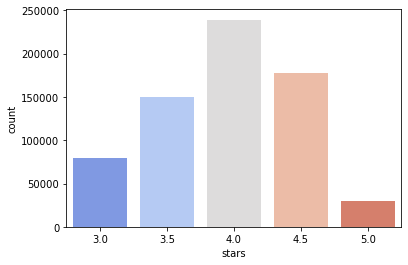

In [194]:
sns.countplot(x='stars',data=yelp_df,palette='coolwarm')

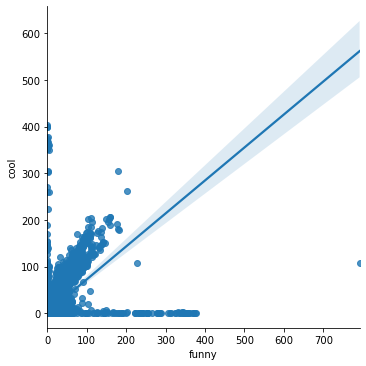

In [200]:
sns.lmplot(x='funny',y='cool',data=yelp_df)

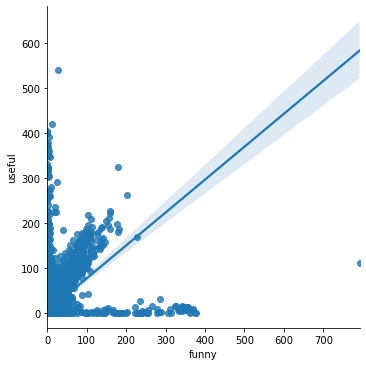

In [201]:
sns.lmplot(x='funny',y='useful',data=yelp_df)

In [15]:
yelp_df[['name','state','stars']].head()

,name,state,stars
0,Commander's Palace,LA,4.5
1,HomeGoods,FL,4.0
2,Thai Basil,FL,4.0
3,Enterprise Rent-A-Car,NJ,3.0
4,French Market,LA,3.5


In [16]:
yelp_df['name'].nunique()

72761

In [17]:
yelp_df['categories'].head()

0    French, Restaurants, Cocktail Bars, Nightlife,...
1    Shopping, Home & Garden, Furniture Stores, Fas...
2                                    Restaurants, Thai
3                          Hotels & Travel, Car Rental
4    Farmers Market, Specialty Food, Shopping Cente...
Name: categories, dtype: object

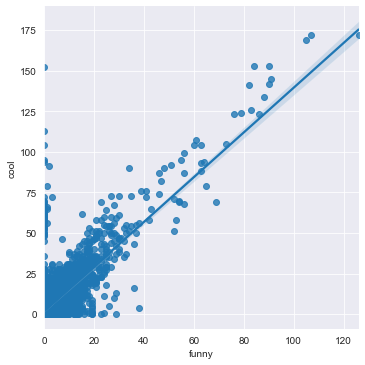

In [18]:
sns.lmplot(x='funny',y='cool',data=yelp_df[yelp_df['stars']==5])

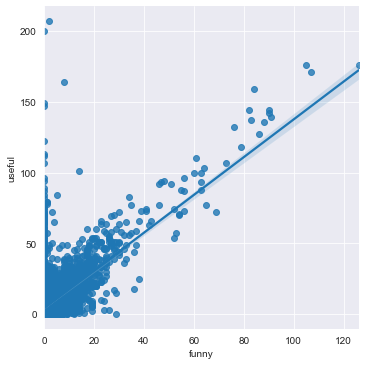

In [19]:
sns.lmplot(x='funny',y='useful',data=yelp_df[yelp_df['stars']==5])

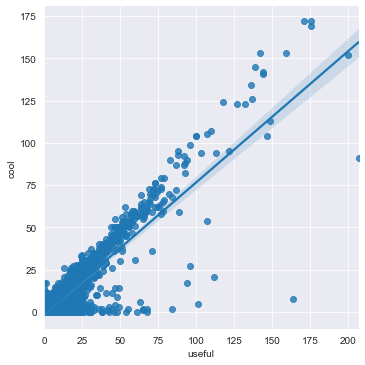

In [20]:
sns.lmplot(x='useful',y='cool',data=yelp_df[yelp_df['stars']==5])

<ipython-input-24-d594b2a70cb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yelp_df.corr(),cmap='coolwarm',annot=True)


<AxesSubplot:>

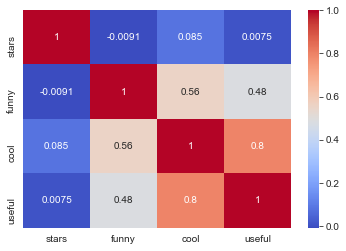

In [24]:
sns.heatmap(yelp_df.corr(),cmap='coolwarm',annot=True)

In [ ]:
g = sns.FacetGrid(data=yelp_df, col='useful', row='cool') #correlated
g.map(sns.distplot,'stars')

In [ ]:
sns.pairplot(yelp_df,hue='stars',palette='rainbow')